In [3]:
# Data Wraling Project (Group 5)

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

In [5]:
# Read in the main data
rdw_df = pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen_20250124.csv')

/var/folders/3c/n5gmhdz9239027d_j5k6mf0h0000gn/T/ipykernel_57216/1148718080.py:3: DtypeWarning: Columns (37,38,41,42,43,44,45,48,64,67,82,84,86,88,90) have mixed types. Specify dtype option on import or set low_memory=False.
  rdw_df = pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen_20250124.csv')


In [14]:
# Gather additional information from the API
import pandas as pd

# API endpoint
BASE_URL = "https://opendata.rdw.nl/resource/8ys7-d773.json"

# Function to build a csv file from the additional source 
def fetch_all_data():
    all_data = []
    offset = 0
    limit = 50000

    while True:
        url = f"{BASE_URL}?$limit={limit}&$offset={offset}"
        print(f"Fetching: {url}")
        
        df = pd.read_json(url)
        if df.empty:
            break 
        
        all_data.append(df)
        offset += limit 
    
    return pd.concat(all_data, ignore_index=True)

full_dataset = fetch_all_data()

full_dataset.to_csv("full_dataset_fueltypes.csv", index=False)

print("Download complete! Data saved as full_dataset.csv")


Download complete! Data saved as full_dataset.csv


In [8]:
# Data Clean up code:

In [9]:
# Convert relevant date columns to datetime format
rdw_df['Datum eerste toelating DT'] = pd.to_datetime(rdw_df['Datum eerste toelating DT']) # Date of first admission
rdw_df['Datum tenaamstelling DT'] = pd.to_datetime(rdw_df['Datum tenaamstelling DT']) # Date of registration in the Netherlands

# Add year column for  year based aggregation
rdw_df['Year'] = rdw_df['Datum eerste toelating DT'].dt.year

# Filter dataset of invalid years (nulls) and cast remaining to int 
rdw_df = rdw_df[rdw_df['Year'].notnull()]
rdw_df['Year'] = rdw_df['Year'].astype(int)

/var/folders/3c/n5gmhdz9239027d_j5k6mf0h0000gn/T/ipykernel_57216/2197842675.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rdw_df['Datum eerste toelating DT'] = pd.to_datetime(rdw_df['Datum eerste toelating DT']) # Date of first admission
/var/folders/3c/n5gmhdz9239027d_j5k6mf0h0000gn/T/ipykernel_57216/2197842675.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  rdw_df['Datum tenaamstelling DT'] = pd.to_datetime(rdw_df['Datum tenaamstelling DT']) # Date of registration in the Netherlands


In [10]:
# (Tomas) 1. How has the sustainability of the Dutch vehicle fleet evolved over time (growth in electric vehicles, decline in diesel and petrol vehicles, adoption of alternative sustainable fuels like hydrogen or biogas, changes in average CO2 emissions across the fleet, etc.)

In [11]:
# Research subquestion 1 code/graphs:

In [3]:
columns_to_load = [
    'Kenteken', 'Voertuigsoort', 'Type gasinstallatie', 'Type', 'Variant', 'Uitvoering',
    'Additionele massa alternatieve aandrijving', 'Zuinigheidsclassificatie',
    'Bruto BPM', 'Aerodynamische voorziening of uitrusting', 'Vermogen massarijklaar',
    'Datum eerste toelating DT', 'Datum tenaamstelling DT',
    'Registratie datum goedkeuring (afschrijvingsmoment BPM) DT',
    'Massa ledig voertuig', 'Massa rijklaar', 'Technische max. massa voertuig',
    'Wielbasis', 'Lengte', 'Breedte', 'Hoogte voertuig'
]

rdw_df = pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen_20250124.csv', usecols=columns_to_load)

C:\Users\karos\AppData\Local\Temp\ipykernel_23304\824050169.py:11: DtypeWarning: Columns (41,42,44,45,48,84,86,88) have mixed types. Specify dtype option on import or set low_memory=False.
  rdw_df = pd.read_csv('Open_Data_RDW__Gekentekende_voertuigen_20250124.csv', usecols=columns_to_load)


In [4]:
rdw_df.rename(columns={'Kenteken': 'kenteken'}, inplace=True)

In [5]:
columns_to_load = [
    'kenteken', 'brandstof_omschrijving', 'emissiecode_omschrijving', 
    'co2_emissieklasse', 'brandstofverbruik_gecombineerd', 
    'co2_uitstoot_gecombineerd', 'netto_max_vermogen_elektrisch', 
    'emissie_co2_gecombineerd_wltp', 'brandstof_verbruik_gecombineerd_wltp', 
    'elektrisch_verbruik_enkel_elektrisch_wltp', 'actie_radius_enkel_elektrisch_wltp', 
    'actie_radius_enkel_elektrisch_stad_wltp', 'co2_uitstoot_gewogen', 
    'emis_deeltjes_type1_wltp', 'max_vermogen_15_minuten', 
    'actie_radius_extern_opladen_wltp', 'brandstof_verbruik_gewogen_gecombineerd_wltp', 
    'emis_co2_gewogen_gecombineerd_wltp', 'elektrisch_verbruik_extern_opladen_wltp', 
    'actie_radius_extern_opladen_stad_wltp'
]

rdw_df_additional = pd.read_csv('full_dataset_fueltypes.csv', usecols=columns_to_load)

C:\Users\karos\AppData\Local\Temp\ipykernel_23304\2441284215.py:14: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  rdw_df_additional = pd.read_csv('full_dataset_fueltypes.csv', usecols=columns_to_load)


In [6]:
df_merged = pd.merge(rdw_df, rdw_df_additional, on="kenteken", how="inner")

In [ ]:
df_merged['brandstof_omschrijving'].unique()

C:\Users\karos\AppData\Local\Temp\ipykernel_23304\1829592551.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['Datum eerste toelating DT'] = pd.to_datetime(df_merged['Datum eerste toelating DT'])


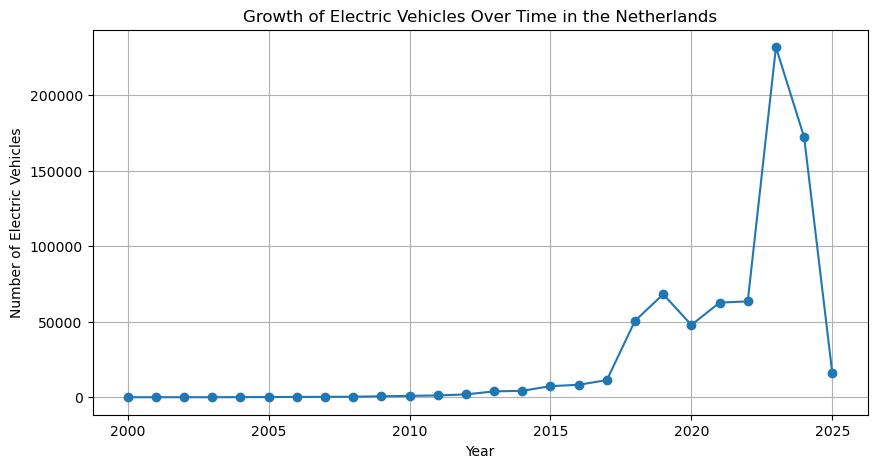

In [11]:
# Convert the date column to datetime
df_merged['Datum eerste toelating DT'] = pd.to_datetime(df_merged['Datum eerste toelating DT'])

# Extract the year
df_merged['Year'] = df_merged['Datum eerste toelating DT'].dt.year

# Filter for electric vehicles
df_electric = df_merged[df_merged['brandstof_omschrijving'].str.contains("Elektriciteit", na=False, case=False)]

# Count number of electric vehicles per year
ev_counts = df_electric.groupby('Year').size()

ev_counts = ev_counts[ev_counts.index >= 2000]

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(ev_counts.index, ev_counts.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Electric Vehicles")
plt.title("Growth of Electric Vehicles Over Time in the Netherlands")
plt.grid(True)
plt.show()

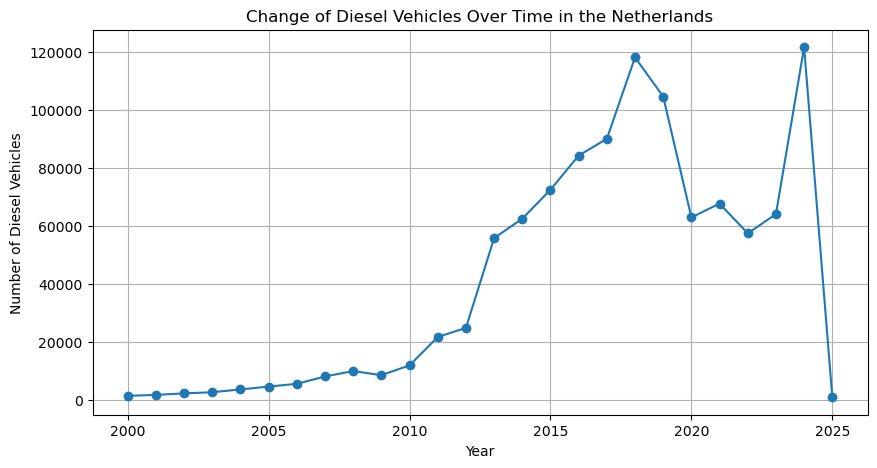

In [12]:
# Filter for diesel vehicles
df_diesel = df_merged[df_merged['brandstof_omschrijving'].str.contains("Diesel", na=False, case=False)]

# Count number of diesel vehicles per year
diesel_counts = df_diesel.groupby('Year').size()

diesel_counts = diesel_counts[diesel_counts.index >= 2000]

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(diesel_counts.index, diesel_counts.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Diesel Vehicles")
plt.title("Change of Diesel Vehicles Over Time in the Netherlands")
plt.grid(True)
plt.show()

<Figure size 1000x500 with 0 Axes>

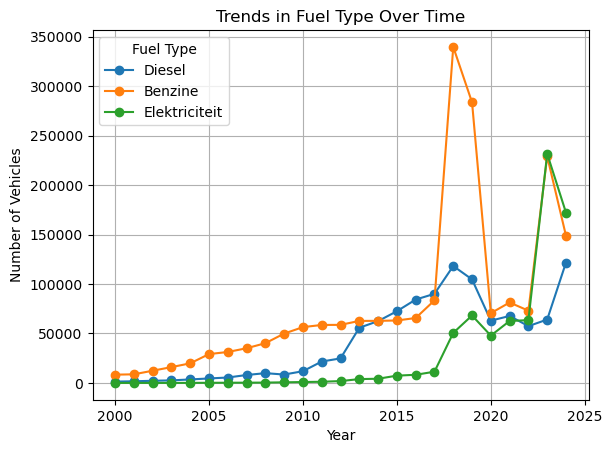

In [31]:
# Plot the different fuel type vehicles over type against each other

fuel_trends = df_merged.groupby(['Year', 'brandstof_omschrijving']).size().unstack()

fuel_trends = fuel_trends[(fuel_trends.index >= 2000) & (fuel_trends.index < 2025)]

plt.figure(figsize=(10, 5))
fuel_trends[['Diesel', 'Benzine', 'Elektriciteit']].plot(marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.title("Trends in Fuel Type Over Time")
plt.grid(True)
plt.legend(title="Fuel Type")
plt.show()

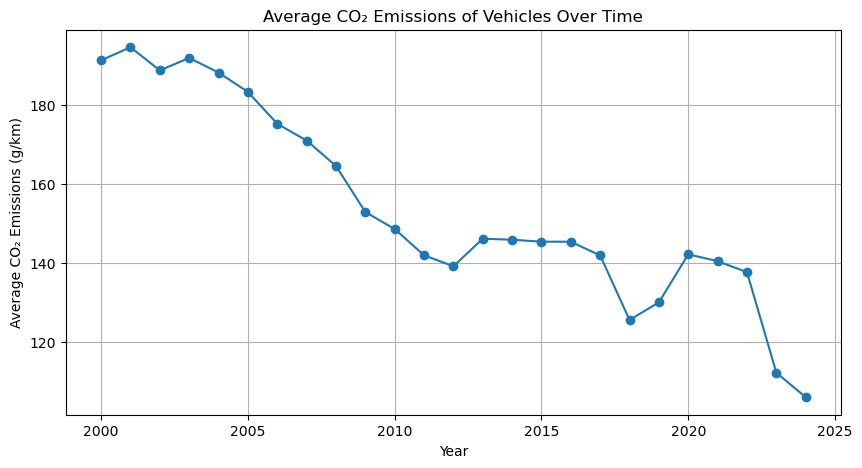

In [33]:
# Plot the CO2 emissions totals across the years

co2_avg = df_merged.groupby('Year')['co2_uitstoot_gecombineerd'].mean()

co2_avg = co2_avg[(co2_avg.index >= 2000) & (co2_avg.index < 2025)]

plt.figure(figsize=(10, 5))
plt.plot(co2_avg.index, co2_avg.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions (g/km)")
plt.title("Average CO₂ Emissions of Vehicles Over Time")
plt.grid(True)
plt.show()

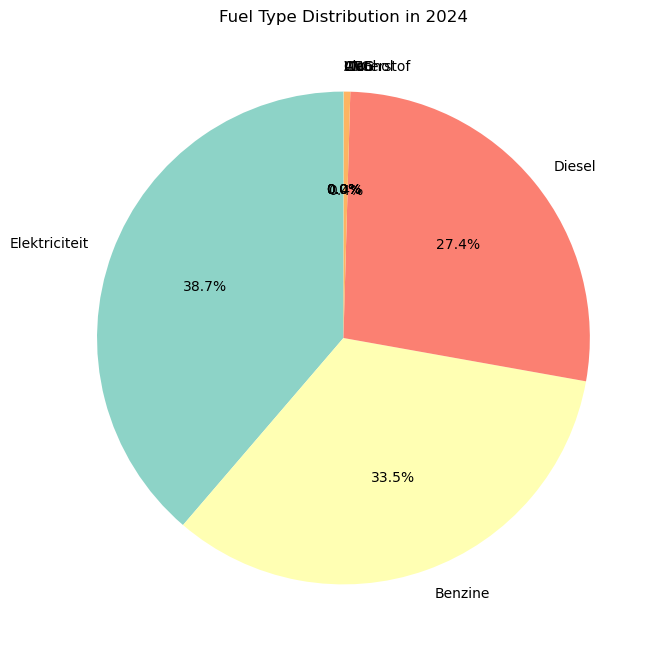

In [15]:
# Plot the distribution of specific fuel type vehicles registered in the year 2024

fuel_counts = df_merged[df_merged['Year'] == 2024]['brandstof_omschrijving'].value_counts()

plt.figure(figsize=(8, 8))
fuel_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Fuel Type Distribution in 2024")
plt.ylabel("")  # Hide y-label
plt.show()

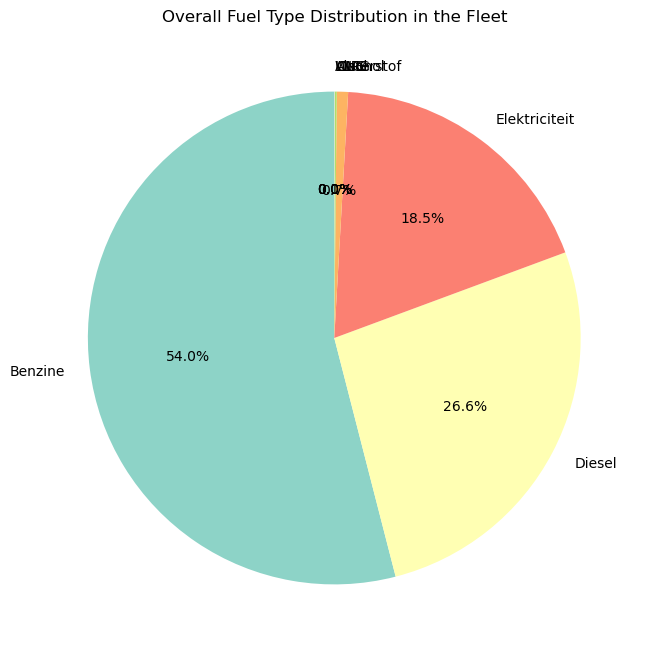

In [17]:
# Plot overall distribution of cars registered within the Netherlands grouped by it's fuel type

fuel_counts = df_merged['brandstof_omschrijving'].value_counts()

plt.figure(figsize=(8, 8))
fuel_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")
plt.title("Overall Fuel Type Distribution in the Fleet")
plt.ylabel("")  # Hide y-label
plt.show()

In [12]:
# (Daniil) 2. What specific types of environmentally friendly vehicles (electric, hybrid, hydrogen, natural gas) are most common and contributed the most to the sustainable vehicles growth in the Netherlands, and how have their registration trends evolved over time?

C:\Users\karos\AppData\Local\Temp\ipykernel_29336\1455905653.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_merged['Datum eerste toelating DT'] = pd.to_datetime(df_merged['Datum eerste toelating DT'])


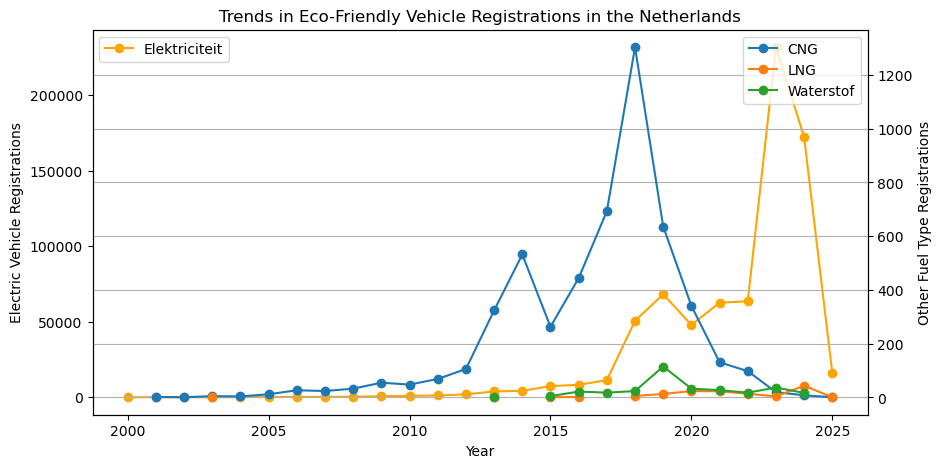

In [3]:
# Load datasets (update file paths if necessary)
columns_to_load_rdw = [
    'Kenteken', 'Voertuigsoort', 'Datum eerste toelating DT'
]
columns_to_load_fuel = [
    'kenteken', 'brandstof_omschrijving'
]

rdw_df = pd.read_csv("Open_Data_RDW__Gekentekende_voertuigen_20250124.csv", usecols=columns_to_load_rdw)
fuel_df = pd.read_csv("full_dataset_fueltypes.csv", usecols=columns_to_load_fuel)

# Standardize column names for merging
rdw_df.rename(columns={'Kenteken': 'kenteken'}, inplace=True)

# Merge vehicle registration data with fuel type data
df_merged = pd.merge(rdw_df, fuel_df, on="kenteken", how="inner")

# Convert the date column to datetime
df_merged['Datum eerste toelating DT'] = pd.to_datetime(df_merged['Datum eerste toelating DT'])

# Extract the year
df_merged['Year'] = df_merged['Datum eerste toelating DT'].dt.year

# Define environmentally friendly fuel types
eco_fuel_types = ['Elektriciteit', 'Hybride', 'Waterstof', 'CNG', 'LNG']

# Filter for eco-friendly vehicles
eco_vehicles = df_merged[df_merged['brandstof_omschrijving'].isin(eco_fuel_types)]

# Count registrations by year and fuel type
eco_trends = eco_vehicles.groupby(['Year', 'brandstof_omschrijving']).size().unstack()

# Filter for years from 2000 onwards to avoid a squeezed graph
eco_trends = eco_trends[eco_trends.index >= 2000]

# Plot with separate Y-axes for better visibility
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()  # Create a second y-axis

# Plot electric vehicles separately
if 'Elektriciteit' in eco_trends.columns:
    eco_trends['Elektriciteit'].plot(ax=ax1, color='orange', marker='o', linestyle='-', label='Elektriciteit')

# Plot other fuel types on a separate axis
other_fuels = eco_trends.drop(columns=['Elektriciteit'], errors='ignore')
if not other_fuels.empty:
    other_fuels.plot(ax=ax2, marker='o', linestyle='-', label=['CNG', 'LNG', 'Waterstof'])

ax1.set_ylabel("Electric Vehicle Registrations")
ax2.set_ylabel("Other Fuel Type Registrations")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title("Trends in Eco-Friendly Vehicle Registrations in the Netherlands")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [15]:
# (Tonko) 3. Which car manufacturers/brands in the Netherlands are the most environmentally friendly? (Registers the most non-fossil fuel vehicle) and which are the least environmentally friendly?

def analyze_brand_fuel_types(recent_vehicles, car_fuel_types, min_cars=1000):
    # Get brands with more than min_cars
    brand_counts = recent_vehicles['Merk'].value_counts()
    significant_brands = brand_counts[brand_counts > min_cars].index
    
    # Standardize column names for merging
    car_fuel_types = car_fuel_types.rename(columns={'kenteken': 'Kenteken'})
    
    # Merge vehicle data with fuel types
    merged_data = recent_vehicles.merge(
        car_fuel_types[['Kenteken', 'brandstof_omschrijving']],
        on='Kenteken',
        how='left'
    )
    
    significant_brand_data = merged_data[merged_data['Merk'].isin(significant_brands)]
    
    fuel_distribution = pd.pivot_table(
        significant_brand_data,
        values='Kenteken',
        index='Merk',
        columns='brandstof_omschrijving',
        aggfunc='count',
        fill_value=0
    )
    
    # Add total vehicles column
    fuel_distribution['Total_Vehicles'] = fuel_distribution.sum(axis=1)
    
    # Calculate percentages
    percentage_distribution = fuel_distribution.div(fuel_distribution['Total_Vehicles'], axis=0) * 100
    
    fuel_distribution = fuel_distribution.sort_values('Total_Vehicles', ascending=False)
    percentage_distribution = percentage_distribution.sort_values('Total_Vehicles', ascending=False)
    
    return fuel_distribution, percentage_distribution

RV_FROM_YEAR = 2015

car_fuel_types = pd.read_csv('full_dataset_fueltypes.csv') # Has column kenteken and brandstof_omschrijving, this consist of ['Benzine' 'Diesel' 'LPG' 'CNG' 'LNG' 'Elektriciteit' 'Waterstof' 'Alcohol']

# Filter for recent years and personal vehicles
recent_vehicles = rdw_df[
    (rdw_df['Year'] >= RV_FROM_YEAR) & 
    (rdw_df['Voertuigsoort'] == 'Personenauto')
].copy()

fuel_counts, fuel_percentages = analyze_brand_fuel_types(recent_vehicles, car_fuel_types)

fuel_counts.to_csv('brand_fuel_counts.csv')
fuel_percentages.to_csv('brand_fuel_percentages.csv')


def calculate_eco_score(df):
    eco_fuels = ['Elektriciteit', 'Waterstof', 'CNG']
    eco_cols = [col for col in eco_fuels if col in df.columns]  # Only use columns that exist
    df['Eco_Score'] = df[eco_cols].sum(axis=1) / df['Total_Vehicles'] * 100
    return df.sort_values('Eco_Score', ascending=False)

eco_rankings = calculate_eco_score(fuel_counts)
print("\nBrands ranked by environmental friendliness (% of eco-friendly vehicles):")
print(eco_rankings[['Total_Vehicles', 'Eco_Score']])



/var/folders/3c/n5gmhdz9239027d_j5k6mf0h0000gn/T/ipykernel_57216/781617852.py:42: DtypeWarning: Columns (3,4,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  car_fuel_types = pd.read_csv('full_dataset_fueltypes.csv') # Has column kenteken and brandstof_omschrijving, this consist of ['Benzine' 'Diesel' 'LPG' 'CNG' 'LNG' 'Elektriciteit' 'Waterstof' 'Alcohol']



Brands ranked by environmental friendliness (% of eco-friendly vehicles):
brandstof_omschrijving  Total_Vehicles   Eco_Score
Merk                                              
TESLA                            71561  100.000000
TESLA MOTORS                      1455  100.000000
POLESTAR                          3344   99.820574
BYD                               2432   98.601974
BMW I                             3910   95.140665
...                                ...         ...
CITROEN                          49226    9.903303
ADRIA                             1880    0.000000
HYMER                             1824    0.000000
CAPRON                            1478    0.000000
KNAUS                             1302    0.000000

[46 rows x 2 columns]


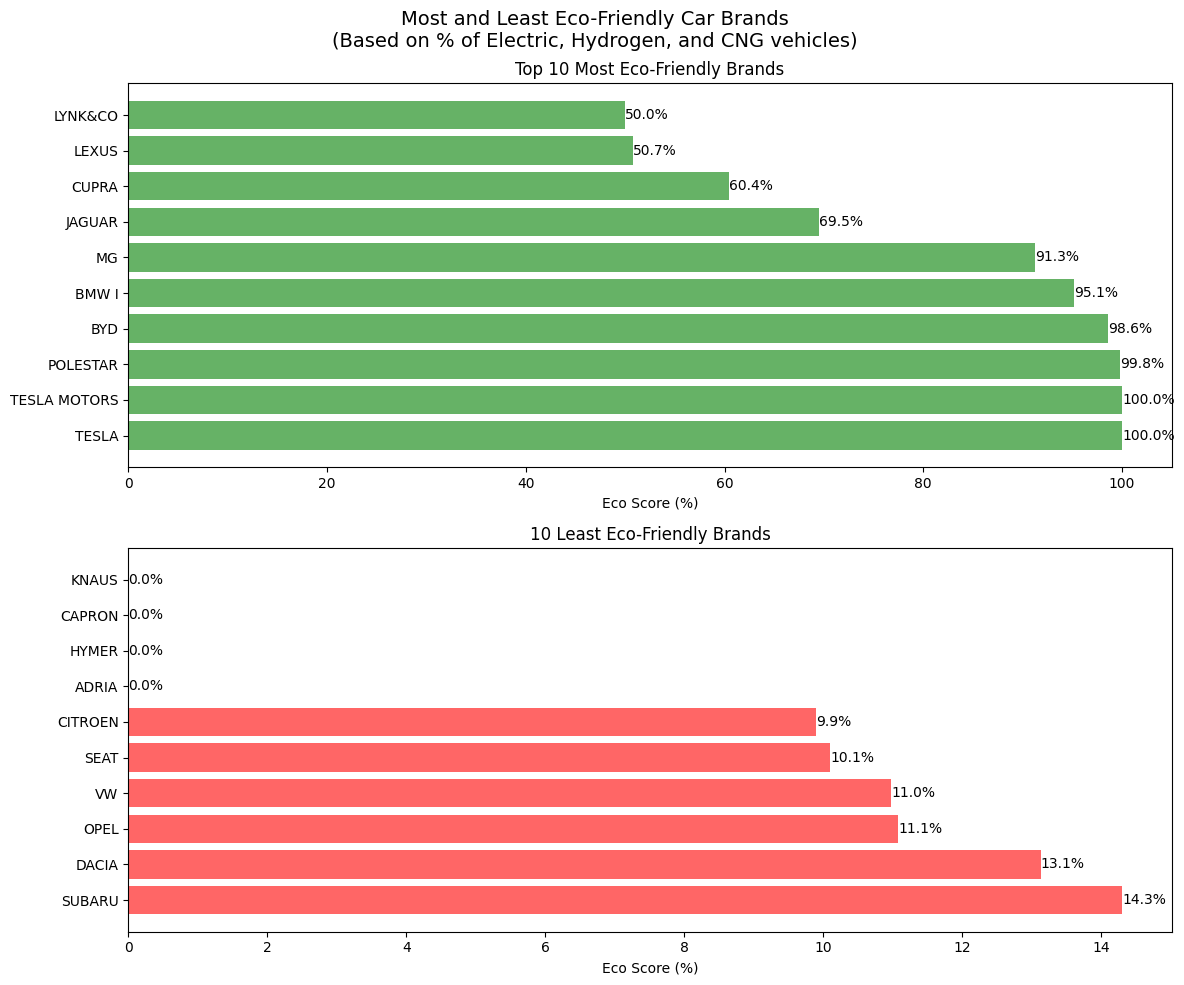

In [17]:
# Create visulaization

def plot_eco_extremes_from_csv(csv_file='brand_fuel_counts.csv', n_brands=10):
    df = pd.read_csv(csv_file)
    df.set_index('Merk', inplace=True)
    
    # Eco score is the percentage of electric, hydrogen, and CNG vehicles
    eco_fuels = ['Elektriciteit', 'Waterstof', 'CNG']
    eco_cols = [col for col in eco_fuels if col in df.columns]
    df['Eco_Score'] = df[eco_cols].sum(axis=1) / df['Total_Vehicles'] * 100
    
    df_sorted = df.sort_values('Eco_Score', ascending=False)
    
    # Get top and bottom brands
    top_brands = df_sorted.head(n_brands)
    bottom_brands = df_sorted.tail(n_brands)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Most and Least Eco-Friendly Car Brands\n(Based on % of Electric, Hydrogen, and CNG vehicles)', fontsize=14)
    
    # Plot most eco-friendly brands
    bars1 = ax1.barh(top_brands.index, top_brands['Eco_Score'], color='green', alpha=0.6)
    ax1.set_title('Top 10 Most Eco-Friendly Brands')
    ax1.set_xlabel('Eco Score (%)')
    
    for bar in bars1:
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', 
                ha='left', va='center', fontsize=10)
    
    # Plot least eco-friendly brands
    bars2 = ax2.barh(bottom_brands.index, bottom_brands['Eco_Score'], color='red', alpha=0.6)
    ax2.set_title('10 Least Eco-Friendly Brands')
    ax2.set_xlabel('Eco Score (%)')
    
    for bar in bars2:
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}%', 
                ha='left', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Create the visualization
plot_eco_extremes_from_csv('brand_fuel_counts.csv')
    